# CSC311 Machine Learning Project 2019 - Group 14

## This notebook performs the Neural Network optimized technique. 

The code below implements the training of the data using Neural Network. 
The normalization used and the highest amount of accuracy achieved after training the data by changing the values the values of Neural Network.

## Libraries

The folowing code we will be talking about is the libraries that will be used to find aspects of `Phase 1B`

In [1]:
import warnings
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report,confusion_matrix, f1_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

## Reading Files

Read in the data files which we created in dividedata. We will read in the files of `group14_train` and `group14_cv`.

In [2]:
training_data = pd.read_csv("dividing data/train_data.csv")
crossval_data = pd.read_csv("dividing data/cv_data.csv")

## Removing values
In the cell below we use the pop function to remove the columns such as `Unnamed` and `User` from the the `training data ` and our `cross validation ` data. We remove these columns because they are not important to the testing of our models.

In [3]:
training_data.pop('Unnamed: 0')
training_data.pop('User')
training_data.head(3)

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,Class
0,0.094568,-0.292415,-0.829242,0.808311,-0.999832,-1.061223,-0.428011,-0.005781,-0.479768,1.029530,-0.290812,-1.032775,0.222251,-1.573760,-0.951098,1
1,0.164180,-0.273078,-0.747491,-0.365735,-0.031963,-0.398817,0.866498,-0.920805,-0.963154,1.096778,-0.275489,-0.950012,0.294329,-1.548137,-0.883220,1
2,0.143341,-0.268184,-0.765351,-0.401403,-0.029721,-0.427667,0.843033,-0.913344,-0.982305,1.078122,-0.263563,-0.962075,0.297303,-1.547822,-0.884921,1


In [4]:
crossval_data.pop('Unnamed: 0')
crossval_data.pop('User')
crossval_data.head(3)

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,Class
0,-0.011697,-1.180810,-2.183332,-1.556744,-1.125719,-1.848526,-0.829392,-0.905204,-1.866450,-1.782878,-0.835387,-1.161360,-1.843616,-1.779319,-1.238216,1
1,0.104689,-1.109310,-2.081804,-0.800283,-0.935223,-1.959605,-1.309219,-0.937808,-1.625959,-1.696088,-0.755318,-1.118794,0.065550,-1.865397,-1.712987,1
2,-1.752188,-1.097561,-1.479767,0.405706,-1.029926,-1.567298,-0.983402,-0.980608,-1.576618,-0.295130,-0.795591,-1.540360,-1.712344,-1.597558,-1.312438,1


## Declaring variables
Below we take the data from training_data and crossval_data and split it up into corresponding variables. With the training data, we take all the columns except the last column "Label" and store it into the variable "X_train" and only the last column into the variable "y_train". We do the exact same with the cross validation data, storing all the columns except the last into the variable "X_test" and the last column into the variable "y_test".

In [5]:
X_train = training_data.drop('Class', axis=1)
y_train = training_data['Class']

X_crossval = crossval_data.drop('Class', axis=1)
y_crossval = crossval_data['Class']

## Optimizing Number of Nodes

The function below attempts to optimize the number of nodes within the hidden layer of the neural network
It does so by creating multiple objects of the ```MLPClassifier()``` class with different ```hidden_layer_sizes``` and tracks their ```f1 score```.

The scores and number of nodes are then plot on a graph 

0.40993661827847067
0.5313841750153343
0.5872009813943979
0.6709261909629932
0.7010836229809855
0.6959721938253935
0.706399509302801
0.6597832754038029
0.6820691065221836
0.6549785319975465
0.7371703128194643
0.6809445921079534
0.6811490492741771
0.7426906563075035
0.6808423635248415
0.6815579636066245
0.6458801881005929
0.7020036802289921
0.6497648742588428
0.6499693314250664
0.6731752197914537
0.6462891024330403
0.6865671641791045
0.6840114496013086
0.662850132897158
0.6495604170926191
0.650889388673073
0.652116131670415
0.6709261909629932
0.7061950521365774
0.7092619096299325
0.6579431609077898
0.6495604170926191
0.6393375587814353
0.6615211613167041
0.6606011040686977
0.6983234512369658
0.6959721938253935
0.6517072173379677
0.6705172766305459


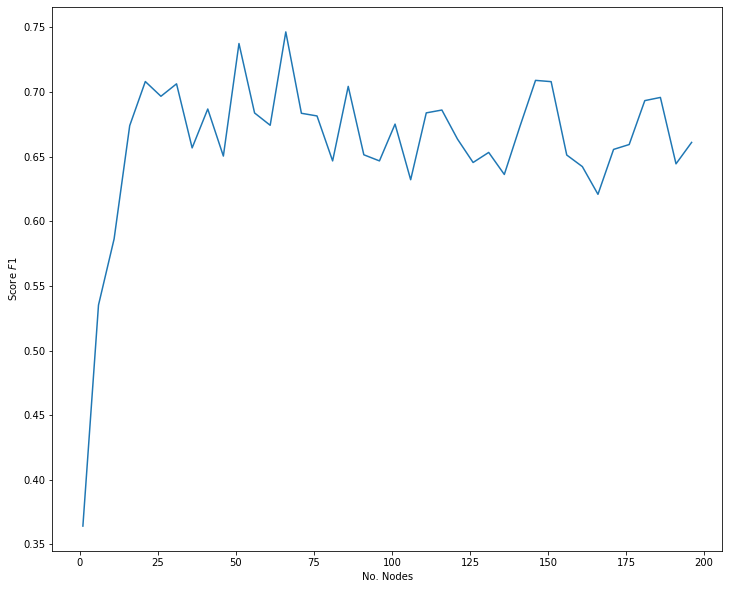

In [6]:
warnings.filterwarnings('ignore')
def nodesVSf1(X, y, X_crossval,y_crossval):    
    
    nodes = []
    for i in range(1,201, 5):        
        nodes.append(i)
    
    f1 = []
    for n in nodes:
        
        clf = MLPClassifier(hidden_layer_sizes=(n),max_iter=250, random_state=1)
        clf.fit(X, y.squeeze())
        yPred = clf.predict(X_crossval)
        print(metrics.accuracy_score(y_crossval, yPred))
        f1.append(f1_score(y_crossval, yPred, average='macro'))
        
    plt.figure(figsize=(12,10))
    plt.plot(nodes, f1)

    plt.xlabel('No. Nodes')
    plt.ylabel('Score $ F1$')
    
nodesVSf1(X_train, y_train, X_crossval, y_crossval)

## Final optimized model is then created and the train data is fit.

In [26]:
clfNN = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(171),max_iter=250, random_state=1)
clfNN.fit(X_train, y_train.squeeze())

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=33, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

## Final model is then used to predict on the cv set of data one last time

A classification report is also printed

In [27]:
yPred = clfNN.predict(X_crossval)

print(classification_report(y_crossval,yPred))

              precision    recall  f1-score   support

           1       0.88      0.99      0.93      1563
           2       0.88      0.75      0.81      2176
           3       0.55      0.55      0.55      1782
           4       0.61      0.76      0.68      1924
           5       0.83      0.71      0.77      2337

    accuracy                           0.74      9782
   macro avg       0.75      0.75      0.75      9782
weighted avg       0.76      0.74      0.75      9782



In [28]:
print(metrics.accuracy_score(y_crossval, yPred))

0.7447352279697403


# Model 
The following will be making use of the pickle library and function save the  Logistic Regression

In [29]:
%store clfNN

Stored 'clfNN' (MLPClassifier)
